In [2]:
using DrWatson
@quickactivate "projectdir()"

In [3]:
include(srcdir("rdpg.jl"))
import Main.rdpg
using PersistenceDiagrams, Pipe, Plots, ProgressMeter, Random, Ripserer, Statistics, StatsBase
using LinearAlgebra, Distances, Manifolds, Distributions, LaTeXStrings
using Manopt

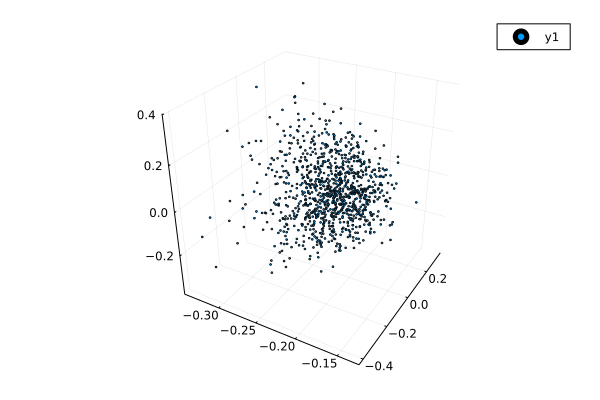

In [4]:
function generate_graph(n)
    Z = rdpg.randSphere(n, d=2)
    dist_max = pairwise(Distances.Euclidean(), Z |> rdpg.t2m) |> maximum
    f = (x, y) -> Distances.Euclidean()(x, y) / dist_max
    return rdpg.Adjacency(f, Z)
end

A = generate_graph(1000)
 X, _ = rdpg.spectralEmbed(A,  d=3, scale=false)
scatter(X |> rdpg.m2t, ms=1)